In [61]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import numpy as np
import pandas as pd


## 1 


pandas shift : values , shift , iloc

In [63]:
prices=pd.read_csv("data/sample_prices.csv")

In [64]:
prices.head()

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070


<AxesSubplot:>

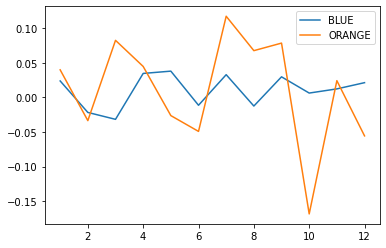

In [65]:
prices.pct_change().dropna().plot()

<AxesSubplot:>

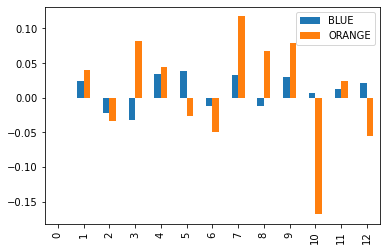

In [66]:
prices.pct_change().plot.bar()

<AxesSubplot:>

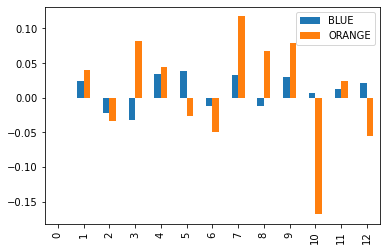

In [67]:
ret=prices.pct_change()
ret.plot.bar()

<AxesSubplot:>

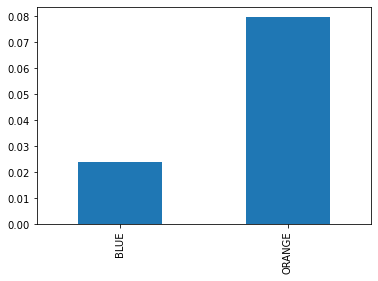

In [68]:
ret.std().plot.bar()

In [69]:
ret.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [70]:
np.prod(ret+1)-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [71]:
(ret+1).prod()-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [72]:
ret.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [73]:
dev=ret-ret.mean()
sq_dev=dev**2
var=sq_dev.sum()/(sq_dev.shape[0]-1)
vol=np.sqrt(var)
vol


BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [74]:
ret.std()*12**0.5

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [75]:
ret=pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",header=0,index_col=0,parse_dates=True,na_values=-99.99)
ret.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [76]:
col=['Lo 10','Hi 10']
rets=ret[col]
rets

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70
...,...,...
201808,2.41,2.34
201809,-1.68,0.87
201810,-10.02,-6.57
201811,-3.65,2.53


In [77]:
rets=rets/100
rets.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [78]:
rets.columns=['s','l']
rets.head()

,s,l
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

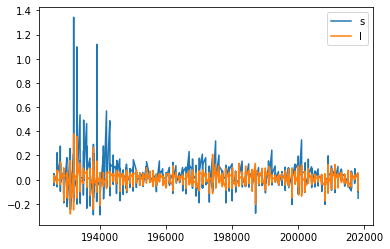

In [79]:
rets.plot()

In [80]:
a_vol=rets.std()*np.sqrt(12)
a_vol

s    0.368193
l    0.186716
dtype: float64

<AxesSubplot:>

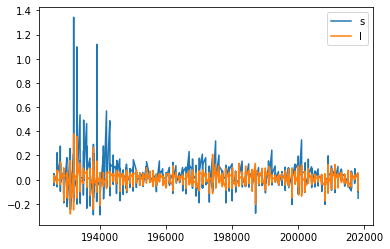

In [81]:
rets.plot()

In [82]:
rets.head()

,s,l
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [83]:
rets.index=pd.to_datetime(rets.index,format="%Y%m")
rets

,s,l
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270
...,...,...
2018-08-01,0.0241,0.0234
2018-09-01,-0.0168,0.0087
2018-10-01,-0.1002,-0.0657
2018-11-01,-0.0365,0.0253


<AxesSubplot:>

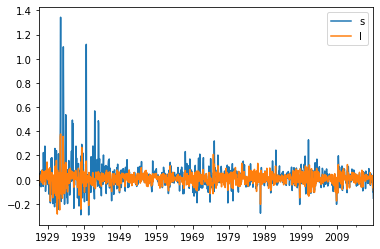

In [84]:
rets.plot()

In [85]:
rets.index=rets.index.to_period('M')
rets.head()

,s,l
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [86]:
rets["1999"]

/tmp/ipykernel_25159/1861600605.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rets["1999"]


,s,l
1999-01,0.1270,0.0284
1999-02,-0.0323,-0.0203
1999-03,-0.0304,0.0291
1999-04,0.0771,0.0698
1999-05,0.0449,-0.0141
1999-06,0.0260,0.0365
1999-07,0.0317,-0.0366
1999-08,-0.0356,-0.0197
1999-09,-0.0275,-0.0329
1999-10,-0.0120,0.0642


<AxesSubplot:>

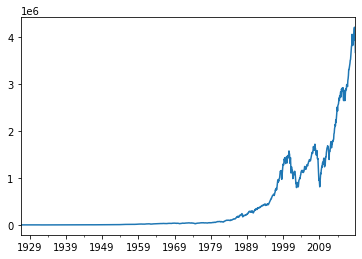

In [87]:
wic=1000*(1+rets['l']).cumprod()
wic.plot()


<AxesSubplot:>

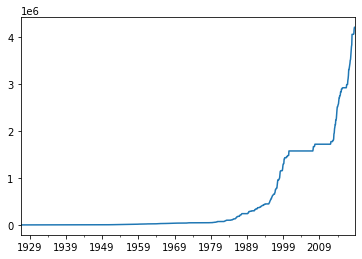

In [88]:
wi_mx=(wic).cummax()
wi_mx.plot()

In [89]:
dd=(wi-wi_mx)/wi_mx
dd


NameError: name 'wi' is not defined

In [90]:
from erk import *
help(ddc)

Help on function ddc in module erk:

ddc(ret: pandas.core.series.Series)
    fraud



In [ ]:
ddc(rets).plot()

In [ ]:
wi

In [ ]:
wi_mx

In [ ]:
jd=pd.DataFrame({
    "we" : wic,
    "p" :wi_mx
    
})
jd.plot()

In [ ]:
jd.head(190)

In [91]:
import erk
hfi=erk.get_hfi_reurns()
hfi

/home/sunny/All_blue/pyfi/edhec/c1/erk.py:20: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hfi=pd.read_csv("data/edhec-hedgefundindices.csv",header=0,index_col=0,parse_dates=True)


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


In [ ]:
import scipy.stats

scipy.stats.skew(hfi)

In [ ]:
nm=np.random.normal(0,.15,size=(263,1))
scipy.stats.skew(nm)

In [ ]:
df = pd.DataFrame(nm, columns = ['Column_A'])
df.plot()

In [ ]:
scipy.stats.kurtosis(nm)

In [ ]:
df1=df.sort_values(by='Column_A')
df1.plot()

In [127]:

ret=pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",header=0,index_col=0,parse_dates=True,na_values=-99.99)
ret.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [129]:
ret.index=pd.to_datetime(ret.index,format="%Y%m")
ret

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
1926-07-01,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
1926-08-01,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
1926-09-01,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
1926-10-01,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
1926-11-01,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
2018-09-01,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
2018-10-01,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
2018-11-01,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In [94]:
we.head()

,Unnamed: 0,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
0,192607,-99.99,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
1,192608,-99.99,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
2,192609,-99.99,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
3,192610,-99.99,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
4,192611,-99.99,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [177]:
ls=ret.loc['1999-01-01':'2015-12-01']["Lo 20"]
ls

1999-01-01    11.14
1999-02-01    -3.99
1999-03-01    -3.08
1999-04-01     8.24
1999-05-01     4.35
              ...  
2015-08-01    -3.47
2015-09-01    -6.10
2015-10-01     3.85
2015-11-01     1.65
2015-12-01    -5.00
Name: Lo 20, Length: 204, dtype: float64

In [132]:
ls

Series([], Name: Lo 20, dtype: float64)

In [178]:
ls100=ls/100
ls100

1999-01-01    0.1114
1999-02-01   -0.0399
1999-03-01   -0.0308
1999-04-01    0.0824
1999-05-01    0.0435
               ...  
2015-08-01   -0.0347
2015-09-01   -0.0610
2015-10-01    0.0385
2015-11-01    0.0165
2015-12-01   -0.0500
Name: Lo 20, Length: 204, dtype: float64

In [151]:
ls100.std()*np.sqrt(12)

0.1727133212125047

In [181]:
(((ls100+1).prod())**(1/(ls.size-1)))**12

1.115021261413889

In [121]:
we.index=we.un

1110

In [154]:
import nb.edhec_risk_kit_129 as kit

/home/sunny/All_blue/pyfi/edhec/c1/nb/edhec_risk_kit_129.py:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if filetype is "returns":
/home/sunny/All_blue/pyfi/edhec/c1/nb/edhec_risk_kit_129.py:39: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "nfirms":
/home/sunny/All_blue/pyfi/edhec/c1/nb/edhec_risk_kit_129.py:42: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "size":


In [ ]:
kit.summary_stats()

In [190]:
ls=ret.loc['1999-01-01':'2016-01-01']["Hi 20"]
ls

def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})


drawdown(ls/100).min()

Wealth            721.706638
Previous Peak    1015.300000
Drawdown           -0.552735
dtype: float64

In [194]:
drawdown(ls/100).idxmin()

Wealth          2002-09-01
Previous Peak   1999-01-01
Drawdown        2009-02-01
dtype: datetime64[ns]

In [176]:
ls

1999-01-01    1.53
1999-02-01   -1.72
1999-03-01    3.68
1999-04-01    6.79
1999-05-01   -0.48
              ... 
2015-08-01   -5.59
2015-09-01   -3.33
2015-10-01    7.10
2015-11-01    0.15
2015-12-01   -2.29
Name: Hi 20, Length: 204, dtype: float64

In [195]:
ind=pd.read_csv("data/ind30_m_ew_rets.csv",header=0,index_col=0,parse_dates=True)/100

In [196]:
ind.index=pd.to_datetime(ind.index,format="%Y%m")

In [199]:
ind.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1110 entries, 1926-07-01 to 2018-12-01
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    1110 non-null   float64
 1   Beer    1110 non-null   float64
 2   Smoke   1110 non-null   float64
 3   Games   1110 non-null   float64
 4   Books   1110 non-null   float64
 5   Hshld   1110 non-null   float64
 6   Clths   1110 non-null   float64
 7   Hlth    1110 non-null   float64
 8   Chems   1110 non-null   float64
 9   Txtls   1110 non-null   float64
 10  Cnstr   1110 non-null   float64
 11  Steel   1110 non-null   float64
 12  FabPr   1110 non-null   float64
 13  ElcEq   1110 non-null   float64
 14  Autos   1110 non-null   float64
 15  Carry   1110 non-null   float64
 16  Mines   1110 non-null   float64
 17  Coal    1110 non-null   float64
 18  Oil     1110 non-null   float64
 19  Util    1110 non-null   float64
 20  Telcm   1110 non-null   float64
 21  Servs   1110 non-nu

In [200]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [203]:
ind.columns=ind.columns.str.strip()